In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tools import *

In [2]:
plt.rc("font", family=["Helvetica", "Arial"])
plt.rc("text", usetex=True)
plt.rc("xtick", top=True, direction="in")
plt.rc("ytick", right=True, direction="in")

In [3]:
## Helper functions
def std_deviation(x_arr) -> float:
    """
    Calculates the standard deviation of a given array of numbers.

    Parameters:
    ----------
    x_arr : ndarray
        Array of floats

    Returns:
    -------
    std_dev : float
        The standard deviation of the input array.
    """
    mean = np.mean(x_arr)
    std_dev = 0
    for val in x_arr:
        std_dev += np.power(val - mean, 2)
    return np.sqrt(1.0/(len(x_arr) - 1) * std_dev)

def std_error(x_arr) -> float:
    """
    Calculates the standard error of a given array of numbers.
     Parameters:
    ----------
    x_arr : ndarray
        Array of floats
     Returns:
    -------
    std_error : float
        The standard error of the input array, calculated as the standard deviation
        divided by the square root of the number of elements in the array.
    """
    return std_deviation(x_arr) / np.sqrt(len(x_arr))

In [4]:
DATA_PATH = "../Data/Exercise_5/"
# Get the number of keys from the first file in the directory
filename = os.listdir(DATA_PATH)[0]
while filename == ".DS_Store":
    filename = np.random.choice(os.listdir(DATA_PATH))
n_keys = np.loadtxt(fname=DATA_PATH+filename, dtype=float, encoding='iso-8859-1')[:,0].astype(int)
# Initialize empty lists to store data
fast_4_independent, slow_4_independent, multiply_shift = [], [], []
# Iterate through all files in the directory
for FILE_NAME in np.array(os.listdir(DATA_PATH))[np.array(os.listdir(DATA_PATH)) != ".DS_Store"]:
    # Load the data from the file
    data = np.loadtxt(fname=DATA_PATH+FILE_NAME, dtype=float)
    # Append the data to the respective lists
    fast_4_independent.append(data[:,1].astype(float).tolist())
    slow_4_independent.append(data[:,2].astype(float).tolist())
    multiply_shift.append(data[:,3].astype(float).tolist())
# Calculate the average of each list
fast_4_independent_avgs = np.mean(np.array(fast_4_independent),axis=0)
slow_4_independent_avgs = np.mean(np.array(slow_4_independent),axis=0)
multiply_shift_avgs     = np.mean(np.array(multiply_shift)    ,axis=0)

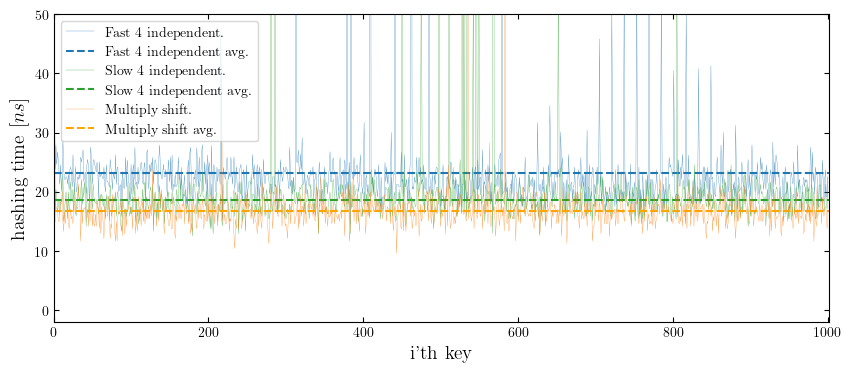

In [5]:
fig, ax = plt.subplots(1,1,figsize=(10,4))

first_x_vals = 1000


ax.plot(n_keys[:first_x_vals], fast_4_independent_avgs[:first_x_vals],color='tab:blue', lw=0.2, label='Fast 4 independent.')
ax.hlines(np.mean(fast_4_independent_avgs),0,n_keys[first_x_vals],ls='--',color='tab:blue', label='Fast 4 independent avg.')

ax.plot(n_keys[:first_x_vals], slow_4_independent_avgs[:first_x_vals],color='tab:green', lw=0.2, label='Slow 4 independent.')
ax.hlines(np.mean(slow_4_independent_avgs),0,n_keys[first_x_vals],ls='--',color='tab:green', label='Slow 4 independent avg.')

ax.plot(n_keys[:first_x_vals], multiply_shift_avgs[:first_x_vals], lw=0.2, color='tab:orange',label='Multiply shift.')
ax.hlines(np.mean(multiply_shift_avgs),0,n_keys[first_x_vals],ls='--',color='orange', label='Multiply shift avg.')


ax.set_xlabel("i'th key", size=14)
ax.set_ylabel(r"hashing time $[ns]$", size=14)
ax.set_ylim(-2,50)
ax.set_xlim(0,n_keys[first_x_vals])

ax.legend()
plt.savefig("exercise_5.pdf")
plt.show()

In [6]:
DATA_PATH = "../Data/Exercise_7/"

# Avg. over multiple seeds
filename = os.listdir(DATA_PATH)[0]
while filename == ".DS_Store":
    filename = np.random.choice(os.listdir(DATA_PATH))
n_keys = np.loadtxt(fname=DATA_PATH+filename, dtype=float, encoding='iso-8859-1')[:,0].astype(int)
average_HWC_update_times, average_sketch_update_times_1 = [], []
average_sketch_update_times_2, average_sketch_update_times_3 = [], []
for FILE_NAME in np.array(os.listdir(DATA_PATH))[np.array(os.listdir(DATA_PATH)) != ".DS_Store"]:
    data = np.loadtxt(fname=DATA_PATH+FILE_NAME, dtype=float)
    average_HWC_update_times.append(data[:,1].astype(float).tolist())
    average_sketch_update_times_1.append(data[:,2].astype(float).tolist())
    average_sketch_update_times_2.append(data[:,3].astype(float).tolist())
    average_sketch_update_times_3.append(data[:,4].astype(float).tolist())

average_HWC_update_times_avgs = np.mean(np.array(average_HWC_update_times), axis=0)
average_sketch_update_times_1_avgs = np.mean(np.array(average_sketch_update_times_1), axis=0)
average_sketch_update_times_2_avgs = np.mean(np.array(average_sketch_update_times_2), axis=0)
average_sketch_update_times_3_avgs = np.mean(np.array(average_sketch_update_times_3), axis=0)

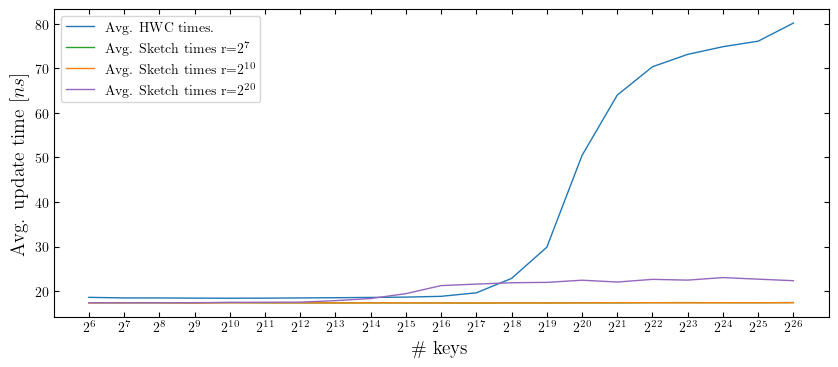

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,4))

ax.plot(n_keys, average_HWC_update_times_avgs,color='tab:blue', lw=1, label='Avg. HWC times.')
ax.plot(n_keys, average_sketch_update_times_1_avgs,color='tab:green', lw=1, label=r'Avg. Sketch times r=$2^7$')
ax.plot(n_keys, average_sketch_update_times_2_avgs,color='tab:orange', lw=1, label=r'Avg. Sketch times r=$2^{10}$')
ax.plot(n_keys, average_sketch_update_times_3_avgs,color='tab:purple', lw=1, label=r'Avg. Sketch times r=$2^{20}$')

ax.set_xlabel("\# keys", size=14)
ax.set_ylabel(r"Avg. update time $[ns]$", size=14)
ax.set_xscale('log',base=2)
ax.set_xticks(n_keys)
ax.set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(n_keys))), int(np.log2(np.max(n_keys))+1))])
ax.legend()
plt.savefig("exercise_7.pdf")
plt.show()

In [8]:
DATA_PATH = "../Data/Exercise_8/"

# Avg. over multiple seeds
filename = os.listdir(DATA_PATH)[0]
while filename == ".DS_Store":
    filename = np.random.choice(os.listdir(DATA_PATH))
r_values = np.loadtxt(fname=DATA_PATH+filename, dtype=float, encoding='iso-8859-1')[:,0].astype(int)
avg_relative_errs, max_relative_errs = [], []
for FILE_NAME in np.array(os.listdir(DATA_PATH))[np.array(os.listdir(DATA_PATH)) != ".DS_Store"]:
    data = np.loadtxt(fname=DATA_PATH+FILE_NAME, dtype=float)
    avg_relative_errs.append(data[:,1].astype(float).tolist())
    max_relative_errs.append(data[:,2].astype(float).tolist())

avg_relative_errs_avgs = np.mean(np.array(avg_relative_errs), axis=0)
max_relative_errs_avgs = np.mean(np.array(max_relative_errs), axis=0)

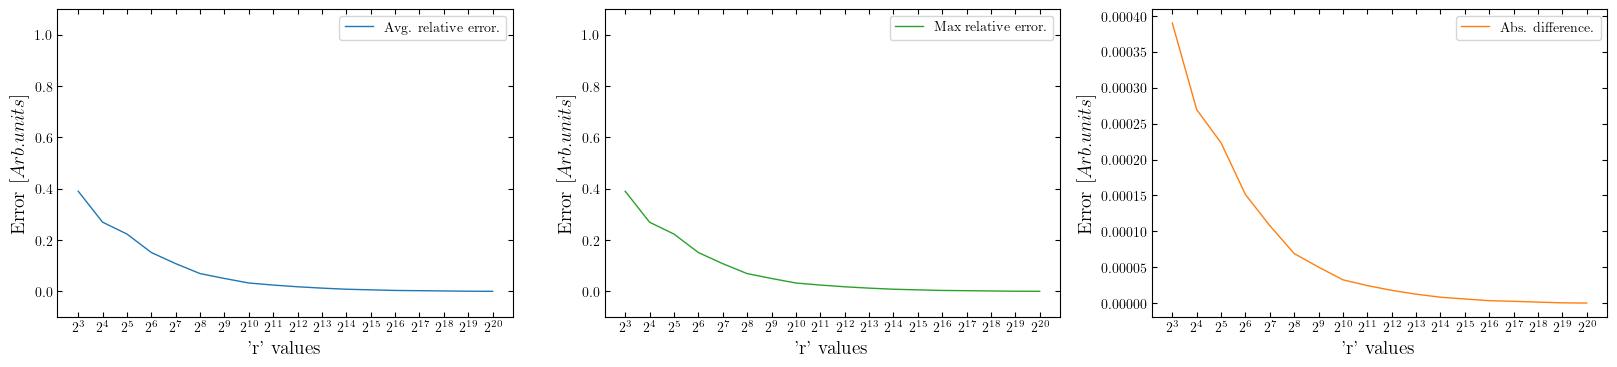

In [9]:
fig, ax = plt.subplots(1,3,figsize=(20,4))

ax[0].plot(r_values, avg_relative_errs_avgs,color='tab:blue', lw=1, label='Avg. relative error.')
ax[0].set_xlabel("'r' values", size=14)
ax[0].set_ylabel(r"Error $[Arb. units]$", size=14)
ax[0].set_ylim(-0.1,1.1)
ax[0].set_xscale('log',base=2)
ax[0].set_xticks(r_values)
ax[0].set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(r_values))), int(np.log2(np.max(r_values))+1))])
ax[0].legend()


ax[1].plot(r_values, max_relative_errs_avgs,color='tab:green', lw=1, label=r'Max relative error.')
ax[1].set_xlabel("'r' values", size=14)
ax[1].set_ylabel(r"Error $[Arb. units]$", size=14)
ax[1].set_ylim(-0.1,1.1)
ax[1].set_xscale('log',base=2)
ax[1].set_xticks(r_values)
ax[1].set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(r_values))), int(np.log2(np.max(r_values))+1))])
ax[1].legend()


ax[2].plot(r_values, np.abs(max_relative_errs_avgs-avg_relative_errs_avgs),color='tab:orange', lw=1, label=r'Abs. difference.')
ax[2].set_xlabel("'r' values", size=14)
ax[2].set_ylabel(r"Error $[Arb. units]$", size=14)
ax[2].set_xscale('log',base=2)
ax[2].set_xticks(r_values)
ax[2].set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(r_values))), int(np.log2(np.max(r_values))+1))])
ax[2].legend()

plt.savefig("exercise_8.pdf")
plt.show()

In [10]:
DATA_PATH = "../Data/Exercise_9/"

# Avg. over multiple seeds
filename = os.listdir(DATA_PATH)[0]
while filename == ".DS_Store":
    filename = np.random.choice(os.listdir(DATA_PATH))
r_values = np.loadtxt(fname=DATA_PATH+filename, dtype=float, encoding='iso-8859-1')[:,0].astype(int)
avg_relative_errs, max_relative_errs = [], []
for FILE_NAME in np.array(os.listdir(DATA_PATH))[np.array(os.listdir(DATA_PATH)) != ".DS_Store"]:
    data = np.loadtxt(fname=DATA_PATH+FILE_NAME, dtype=float)
    avg_relative_errs.append(data[:,1].astype(float).tolist())
    max_relative_errs.append(data[:,2].astype(float).tolist())

avg_relative_errs_avgs = np.mean(np.array(avg_relative_errs), axis=0)
max_relative_errs_avgs = np.mean(np.array(max_relative_errs), axis=0)

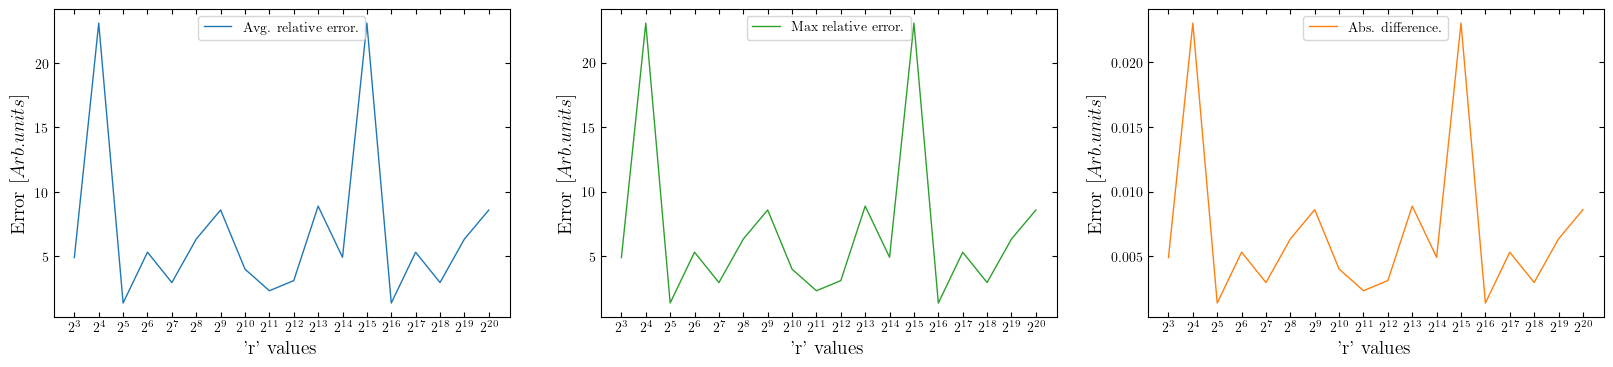

In [11]:
fig, ax = plt.subplots(1,3,figsize=(20,4))

ax[0].plot(r_values, avg_relative_errs_avgs,color='tab:blue', lw=1, label='Avg. relative error.')
ax[0].set_xlabel("'r' values", size=14)
ax[0].set_ylabel(r"Error $[Arb. units]$", size=14)
#ax[0].set_ylim(-0.1,10.5)
ax[0].set_xscale('log',base=2)
ax[0].set_xticks(r_values)
ax[0].set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(r_values))), int(np.log2(np.max(r_values))+1))])
ax[0].legend()

ax[1].plot(r_values, max_relative_errs_avgs,color='tab:green', lw=1, label=r'Max relative error.')
ax[1].set_xlabel("'r' values", size=14)
ax[1].set_ylabel(r"Error $[Arb. units]$", size=14)
#ax[1].set_ylim(-0.1,10.5)
ax[1].set_xscale('log',base=2)
ax[1].set_xticks(r_values)
ax[1].set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(r_values))), int(np.log2(np.max(r_values))+1))])
ax[1].legend()

ax[2].plot(r_values, np.abs(max_relative_errs_avgs-avg_relative_errs_avgs),color='tab:orange', lw=1, label=r'Abs. difference.')
ax[2].set_xlabel("'r' values", size=14)
ax[2].set_ylabel(r"Error $[Arb. units]$", size=14)
#ax[2].set_ylim(-0.1,1.1)
ax[2].set_xscale('log',base=2)
ax[2].set_xticks(r_values)
ax[2].set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(r_values))), int(np.log2(np.max(r_values))+1))])
ax[2].legend()

plt.savefig("exercise_9.pdf")
plt.show()

## Exercise 9 with outliers removed using Z-score:

In [12]:
DATA_PATH = "../Data/Exercise_9/"

# Avg. over multiple seeds
filename = os.listdir(DATA_PATH)[0]
while filename == ".DS_Store":
    filename = np.random.choice(os.listdir(DATA_PATH))
r_values = np.loadtxt(fname=DATA_PATH+filename, dtype=float, encoding='iso-8859-1')[:,0].astype(int)
avg_relative_errs, max_relative_errs = [], []
for FILE_NAME in np.array(os.listdir(DATA_PATH))[np.array(os.listdir(DATA_PATH)) != ".DS_Store"]:
    data = np.loadtxt(fname=DATA_PATH+FILE_NAME, dtype=float)
    avg_relative_errs.append(data[:,1].astype(float).tolist())
    max_relative_errs.append(data[:,2].astype(float).tolist())

# Removing Outliers
R_1, R_2 = np.array(avg_relative_errs), np.array(max_relative_errs)
removed_avgs, removed_maxs = 0, 0
sorted_avg_relative_errs, sorted_max_relative_errs = [], []
for r in range(len(r_values)):
    sorted_1, outliers_1 = remove_outliers_Z(arr=R_1[:,r])
    sorted_2, outliers_2 = remove_outliers_Z(arr=R_2[:,r])
    sorted_avg_relative_errs.append(np.mean(sorted_1))
    sorted_max_relative_errs.append(np.mean(sorted_2))
    removed_avgs += len(outliers_1)
    removed_maxs += len(outliers_2)
print("============ STATUS : =============")
print("Removed: ", removed_avgs, "/", len(r_values) * len(avg_relative_errs), "avgs.")
print("Corresponding to: ", np.round((removed_avgs / (len(r_values) * len(avg_relative_errs)) * 100),3), "% \n")
print("Removed: ", removed_maxs, "/", len(r_values) * len(max_relative_errs), "maxs.")
print("Corresponding to: ", np.round((removed_maxs / (len(r_values) * len(max_relative_errs)) * 100),3), "%")
print("===================================")

============ STATUS : =============
Removed:  36 / 1800 avgs.
Corresponding to:  2.0 % 

Removed:  36 / 1800 maxs.
Corresponding to:  2.0 %


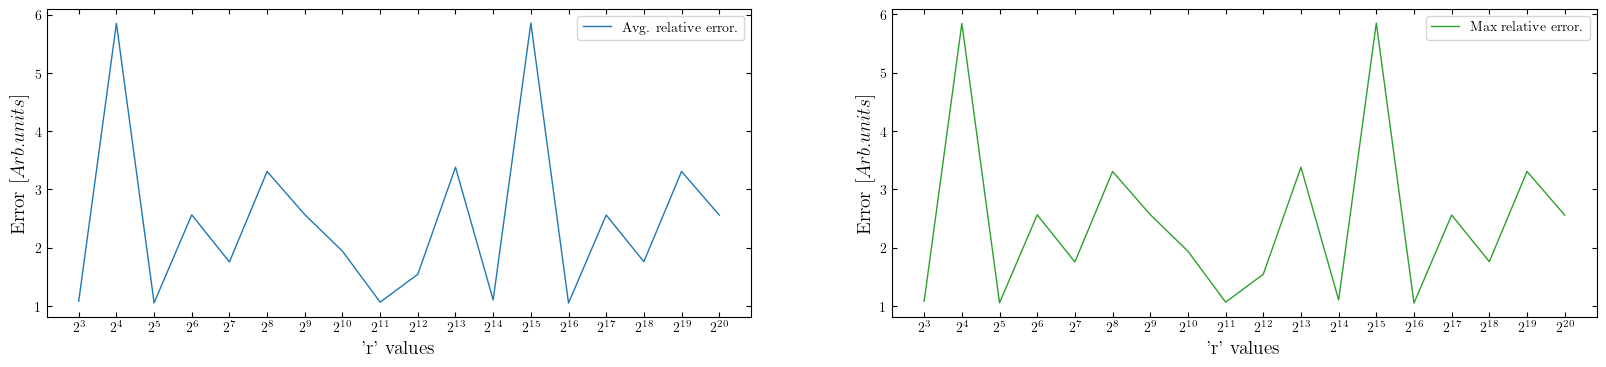

In [13]:
fig, ax = plt.subplots(1,2,figsize=(20,4))

ax[0].plot(r_values, sorted_avg_relative_errs,color='tab:blue', lw=1, label='Avg. relative error.')
ax[0].set_xlabel("'r' values", size=14)
ax[0].set_ylabel(r"Error $[Arb. units]$", size=14)
#ax[0].set_ylim(-0.1,10.5)
ax[0].set_xscale('log',base=2)
ax[0].set_xticks(r_values)
ax[0].set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(r_values))), int(np.log2(np.max(r_values))+1))])
ax[0].legend()

ax[1].plot(r_values, sorted_max_relative_errs,color='tab:green', lw=1, label=r'Max relative error.')
ax[1].set_xlabel("'r' values", size=14)
ax[1].set_ylabel(r"Error $[Arb. units]$", size=14)
#ax[1].set_ylim(-0.1,10.5)
ax[1].set_xscale('log',base=2)
ax[1].set_xticks(r_values)
ax[1].set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(r_values))), int(np.log2(np.max(r_values))+1))])
ax[1].legend()

plt.savefig("exercise_9_outliers_removed_Z.pdf")
plt.show()

## Exercise 9 with outliers removed using Tukey's fences:


In [14]:
DATA_PATH = "../Data/Exercise_9/"

# Avg. over multiple seeds
filename = os.listdir(DATA_PATH)[0]
while filename == ".DS_Store":
    filename = np.random.choice(os.listdir(DATA_PATH))
r_values = np.loadtxt(fname=DATA_PATH+filename, dtype=float, encoding='iso-8859-1')[:,0].astype(int)
avg_relative_errs, max_relative_errs = [], []
for FILE_NAME in np.array(os.listdir(DATA_PATH))[np.array(os.listdir(DATA_PATH)) != ".DS_Store"]:
    data = np.loadtxt(fname=DATA_PATH+FILE_NAME, dtype=float)
    avg_relative_errs.append(data[:,1].astype(float).tolist())
    max_relative_errs.append(data[:,2].astype(float).tolist())

# Removing Outliers
R_1, R_2 = np.array(avg_relative_errs), np.array(max_relative_errs)
removed_avgs, removed_maxs = 0, 0
sorted_avg_relative_errs, sorted_max_relative_errs = [], []
for r in range(len(r_values)):
    sorted_1, outliers_1 = remove_outliers_tukey(arr=R_1[:,r])
    sorted_2, outliers_2 = remove_outliers_tukey(arr=R_2[:,r])
    sorted_avg_relative_errs.append(np.mean(sorted_1))
    sorted_max_relative_errs.append(np.mean(sorted_2))
    removed_avgs += len(outliers_1)
    removed_maxs += len(outliers_2)
print("============ STATUS : =============")
print("Removed: ", removed_avgs, "/", len(r_values) * len(avg_relative_errs), "avgs.")
print("Corresponding to: ", np.round((removed_avgs / (len(r_values) * len(avg_relative_errs)) * 100),3), "% \n")
print("Removed: ", removed_maxs, "/", len(r_values) * len(max_relative_errs), "maxs.")
print("Corresponding to: ", np.round((removed_maxs / (len(r_values) * len(max_relative_errs)) * 100),3), "%")
print("===================================")

============ STATUS : =============
Removed:  411 / 1800 avgs.
Corresponding to:  22.833 % 

Removed:  411 / 1800 maxs.
Corresponding to:  22.833 %


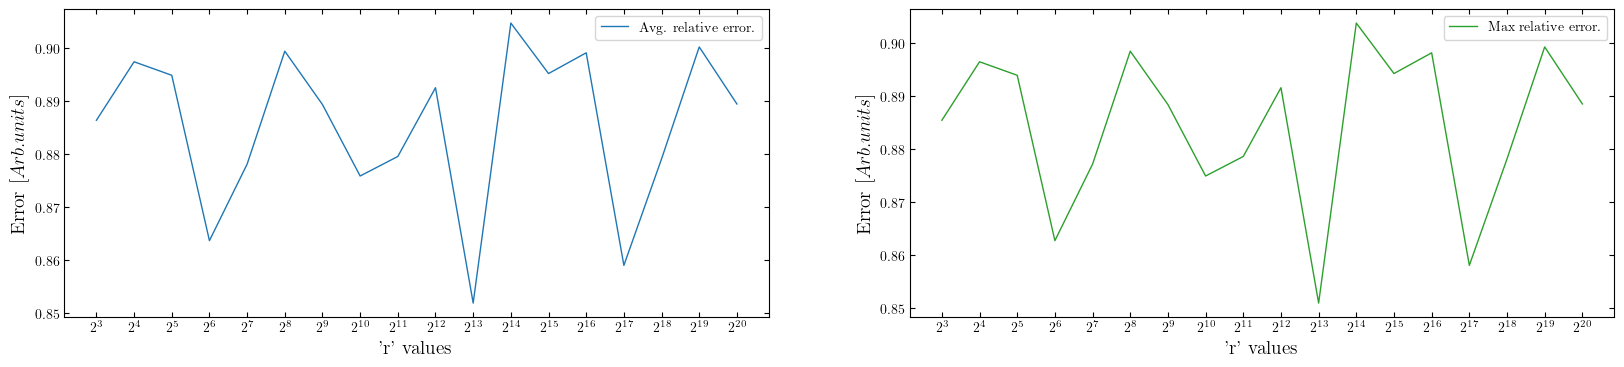

In [15]:
fig, ax = plt.subplots(1,2,figsize=(20,4))

ax[0].plot(r_values, sorted_avg_relative_errs,color='tab:blue', lw=1, label='Avg. relative error.')
ax[0].set_xlabel("'r' values", size=14)
ax[0].set_ylabel(r"Error $[Arb. units]$", size=14)
#ax[0].set_ylim(-0.1,10.5)
ax[0].set_xscale('log',base=2)
ax[0].set_xticks(r_values)
ax[0].set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(r_values))), int(np.log2(np.max(r_values))+1))])
ax[0].legend()

ax[1].plot(r_values, sorted_max_relative_errs,color='tab:green', lw=1, label=r'Max relative error.')
ax[1].set_xlabel("'r' values", size=14)
ax[1].set_ylabel(r"Error $[Arb. units]$", size=14)
#ax[1].set_ylim(-0.1,10.5)
ax[1].set_xscale('log',base=2)
ax[1].set_xticks(r_values)
ax[1].set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(r_values))), int(np.log2(np.max(r_values))+1))])
ax[1].legend()

plt.savefig("exercise_9_outliers_removed_tukey.pdf")
plt.show()

## Exercise 9 with outliers removed using Chauvenet's criterion:


In [16]:
DATA_PATH = "../Data/Exercise_9/"

# Avg. over multiple seeds
filename = os.listdir(DATA_PATH)[0]
while filename == ".DS_Store":
    filename = np.random.choice(os.listdir(DATA_PATH))
r_values = np.loadtxt(fname=DATA_PATH+filename, dtype=float, encoding='iso-8859-1')[:,0].astype(int)
avg_relative_errs, max_relative_errs = [], []
for FILE_NAME in np.array(os.listdir(DATA_PATH))[np.array(os.listdir(DATA_PATH)) != ".DS_Store"]:
    data = np.loadtxt(fname=DATA_PATH+FILE_NAME, dtype=float)
    avg_relative_errs.append(data[:,1].astype(float).tolist())
    max_relative_errs.append(data[:,2].astype(float).tolist())

# Removing Outliers
R_1, R_2 = np.array(avg_relative_errs), np.array(max_relative_errs)
removed_avgs, removed_maxs = 0, 0
sorted_avg_relative_errs, sorted_max_relative_errs = [], []
for r in range(len(r_values)):
    sorted_1, outliers_1 = remove_outliers_chauvenet(arr=R_1[:,r])
    sorted_2, outliers_2 = remove_outliers_chauvenet(arr=R_2[:,r])
    sorted_avg_relative_errs.append(np.mean(sorted_1))
    sorted_max_relative_errs.append(np.mean(sorted_2))
    removed_avgs += len(outliers_1)
    removed_maxs += len(outliers_2)
print("============ STATUS : =============")
print("Removed: ", removed_avgs, "/", len(r_values) * len(avg_relative_errs), "avgs.")
print("Corresponding to: ", np.round((removed_avgs / (len(r_values) * len(avg_relative_errs)) * 100),3), "% \n")
print("Removed: ", removed_maxs, "/", len(r_values) * len(max_relative_errs), "maxs.")
print("Corresponding to: ", np.round((removed_maxs / (len(r_values) * len(max_relative_errs)) * 100),3), "%")
print("===================================")

============ STATUS : =============
Removed:  48 / 1800 avgs.
Corresponding to:  2.667 % 

Removed:  48 / 1800 maxs.
Corresponding to:  2.667 %


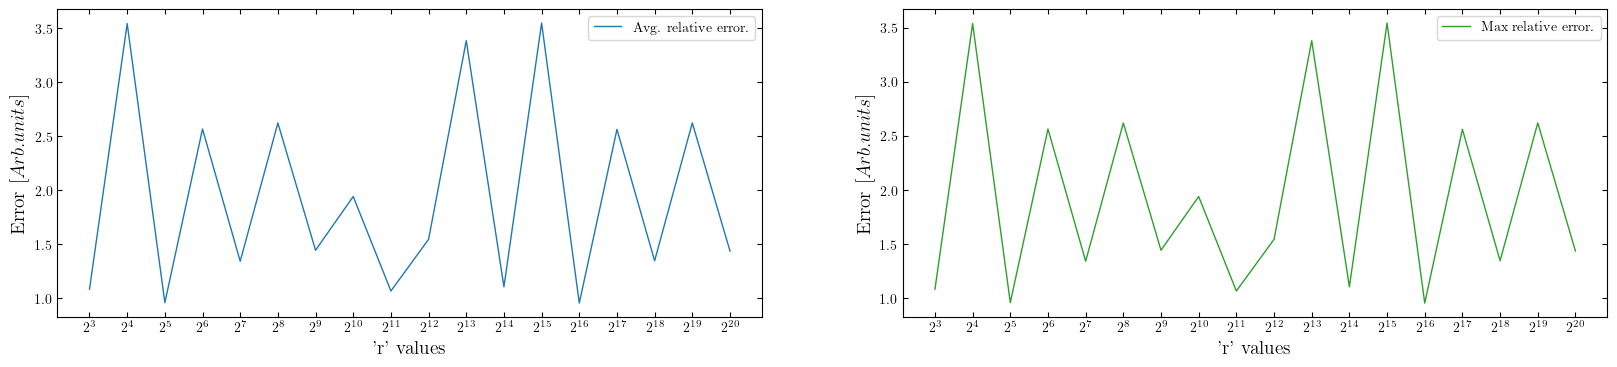

In [17]:
fig, ax = plt.subplots(1,2,figsize=(20,4))

ax[0].plot(r_values, sorted_avg_relative_errs,color='tab:blue', lw=1, label='Avg. relative error.')
ax[0].set_xlabel("'r' values", size=14)
ax[0].set_ylabel(r"Error $[Arb. units]$", size=14)
#ax[0].set_ylim(-0.1,10.5)
ax[0].set_xscale('log',base=2)
ax[0].set_xticks(r_values)
ax[0].set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(r_values))), int(np.log2(np.max(r_values))+1))])
ax[0].legend()

ax[1].plot(r_values, sorted_max_relative_errs,color='tab:green', lw=1, label=r'Max relative error.')
ax[1].set_xlabel("'r' values", size=14)
ax[1].set_ylabel(r"Error $[Arb. units]$", size=14)
#ax[1].set_ylim(-0.1,10.5)
ax[1].set_xscale('log',base=2)
ax[1].set_xticks(r_values)
ax[1].set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(r_values))), int(np.log2(np.max(r_values))+1))])
ax[1].legend()

plt.savefig("exercise_9_outliers_removed_Chauvenet.pdf")
plt.show()

# Manual removal of outliers:

In [25]:
DATA_PATH = "../Data/Exercise_9/"

# Avg. over multiple seeds
filename = os.listdir(DATA_PATH)[0]
while filename == ".DS_Store":
    filename = np.random.choice(os.listdir(DATA_PATH))
r_values = np.loadtxt(fname=DATA_PATH+filename, dtype=float, encoding='iso-8859-1')[:,0].astype(int)
avg_relative_errs, max_relative_errs = [], []
for FILE_NAME in np.array(os.listdir(DATA_PATH))[np.array(os.listdir(DATA_PATH)) != ".DS_Store"]:
    data = np.loadtxt(fname=DATA_PATH+FILE_NAME, dtype=float)
    avg_relative_errs.append(data[:,1].astype(float).tolist())
    max_relative_errs.append(data[:,2].astype(float).tolist())

avg_relative_errs = np.array(avg_relative_errs)
max_relative_errs = np.array(max_relative_errs)

avg_relative_errs_filtered = []
max_relative_errs_filtered = []
for r_val in range(avg_relative_errs.shape[1]):
    _ = ((avg_relative_errs[:,r_val])[avg_relative_errs[:,r_val] <= 1.0]).tolist()
    avg_relative_errs_filtered.append(np.mean(_))
    _ = ((max_relative_errs[:,r_val])[max_relative_errs[:,r_val] <= 1.0]).tolist()
    max_relative_errs_filtered.append(np.mean(_))


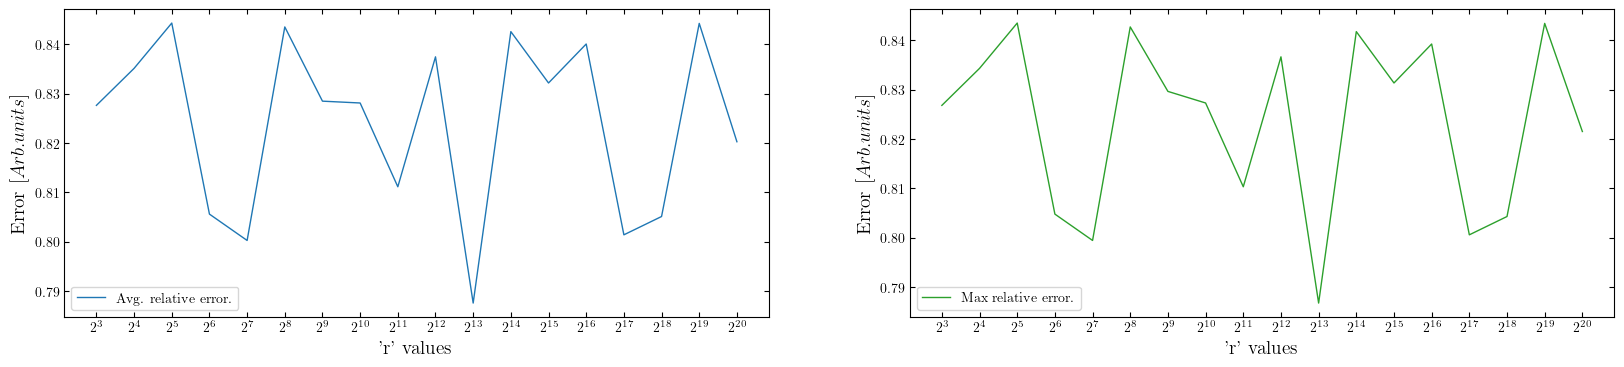

In [26]:
fig, ax = plt.subplots(1,2,figsize=(20,4))

ax[0].plot(r_values, avg_relative_errs_filtered,color='tab:blue', lw=1, label='Avg. relative error.')
ax[0].set_xlabel("'r' values", size=14)
ax[0].set_ylabel(r"Error $[Arb. units]$", size=14)
#ax[0].set_ylim(-0.1,10.5)
ax[0].set_xscale('log',base=2)
ax[0].set_xticks(r_values)
ax[0].set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(r_values))), int(np.log2(np.max(r_values))+1))])
ax[0].legend()

ax[1].plot(r_values, max_relative_errs_filtered,color='tab:green', lw=1, label=r'Max relative error.')
ax[1].set_xlabel("'r' values", size=14)
ax[1].set_ylabel(r"Error $[Arb. units]$", size=14)
#ax[1].set_ylim(-0.1,10.5)
ax[1].set_xscale('log',base=2)
ax[1].set_xticks(r_values)
ax[1].set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(r_values))), int(np.log2(np.max(r_values))+1))])
ax[1].legend()

plt.savefig("exercise_9_outliers_removed_manuel.pdf")
plt.show()

## EXTRA: Testing the upper bound of the variance (Exercise 2)

\begin{equation}
\textrm{Var}\big[X\big]\leq\frac{2\Big(||f||_2^2\Big)^2}{r}
\end{equation}

In [18]:
DATA_PATH = "../Data/Extra/"

# Avg. over multiple seeds
filename = os.listdir(DATA_PATH)[0]
while filename == ".DS_Store":
    filename = np.random.choice(os.listdir(DATA_PATH))
r_values = np.loadtxt(fname=DATA_PATH+filename, dtype=float, encoding='iso-8859-1')[:,0].astype(int)
avg_variance, avg_upper_bound = [], []
for FILE_NAME in np.array(os.listdir(DATA_PATH))[np.array(os.listdir(DATA_PATH)) != ".DS_Store"]:
    data = np.loadtxt(fname=DATA_PATH+FILE_NAME, dtype=float)
    avg_variance.append(data[:,1].astype(float).tolist())
    avg_upper_bound.append(data[:,2].astype(float).tolist())

avg_variance = np.mean(np.array(avg_variance), axis=0)
avg_upper_bound = np.mean(np.array(avg_upper_bound), axis=0)

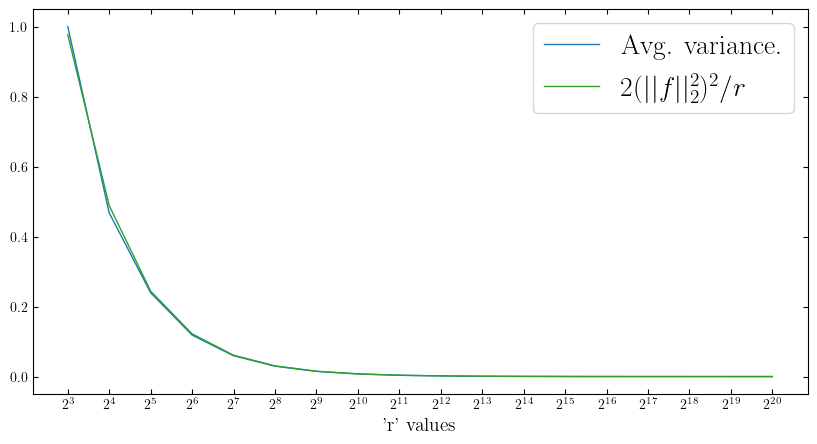

In [19]:
fig, ax = plt.subplots(1,1,figsize=(10,5))

normalizer = max(np.max(avg_variance),np.max(avg_upper_bound))

ax.plot(r_values, avg_variance/normalizer,color='tab:blue', lw=1, label='Avg. variance.')
ax.plot(r_values, avg_upper_bound/normalizer,color='tab:green', lw=1, label=r'$2(||f||_2^2)^2/r$')
ax.set_xlabel("'r' values", size=14)
#ax[0].set_ylim(-0.1,10.5)
ax.set_xscale('log',base=2)
ax.set_xticks(r_values)
ax.set_xticklabels([f"$2^{{{i}}}$" for i in range(int(np.log2(np.min(r_values))), int(np.log2(np.max(r_values))+1))])
ax.legend(fontsize=20)
plt.savefig("extra_variance_bound.pdf")
plt.show()